<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Attrition-Analysis" data-toc-modified-id="Introduction-to-Attrition-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Attrition Analysis</a></span><ul class="toc-item"><li><span><a href="#The-Problem" data-toc-modified-id="The-Problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Problem</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-Partitioning" data-toc-modified-id="Data-Partitioning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Partitioning</a></span></li><li><span><a href="#Data-Modeling-with-Machine-Learning" data-toc-modified-id="Data-Modeling-with-Machine-Learning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Modeling with Machine Learning</a></span><ul class="toc-item"><li><span><a href="#XGBoost-model" data-toc-modified-id="XGBoost-model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>XGBoost model</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#SVM-model" data-toc-modified-id="SVM-model-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>SVM model</a></span></li><li><span><a href="#Logistic-regression-model" data-toc-modified-id="Logistic-regression-model-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Logistic regression model</a></span></li></ul></li></ul></li><li><span><a href="#R-Shiny-Employee-Attrition-Modeling-Application" data-toc-modified-id="R-Shiny-Employee-Attrition-Modeling-Application-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>R-Shiny Employee Attrition Modeling Application</a></span><ul class="toc-item"><li><span><a href="#Fine-Tuning-the-Results" data-toc-modified-id="Fine-Tuning-the-Results-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fine-Tuning the Results</a></span><ul class="toc-item"><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Precision-and-Recall" data-toc-modified-id="Precision-and-Recall-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Precision and Recall</a></span></li></ul></li></ul></li></ul></div>

## Introduction to Attrition Analysis
- It is often difficult for an HR department to identify which employees are most likely to leave the company and for what reasons; this project aims to give a way to leverage machine learning to better understand employees.
- In this project I have created R Shiny application for this project, all of the analysis are visualized in the Shiny application.

### The Problem
- Employee attrition is the rate at which employees leave a company.
- The goal of this analysis is to model employee attrition and determine the most dominant contributing factors that govern this turnover.
- Through this kind of analysis, we can understand how many employees are likely to leave, while also determining which employees are at the highest risk and for what reasons.

### Exploratory Data Analysis
- The dataset used in this analysis is provided from IBM HR to study about employee attrition, which can be found at below link.
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

- In terms of machine learning analysis, the data needs to be initially cleaned.
- This will allow for the maximum accuracy of the final model when we start processing.

In [1]:
# Importing data
d <- read.csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [2]:
# Dropping the the columns with constant values or no variability.
library(caret)
head(d[nearZeroVar(d)])

Loading required package: lattice
Loading required package: ggplot2


EmployeeCount,Over18,StandardHours
1,Y,80
1,Y,80
1,Y,80
1,Y,80
1,Y,80
1,Y,80


- Drop Over18 as there is no variability, all are Y.
- Drop EmployeeCount as there is no variability, all are 1.
- Drop StandardHours as there is no variability, all are 80.
- Also, drop Employee Number as it is just an identifier.

In [3]:
d$Over18 <- NULL
d$EmployeeCount <- NULL
d$StandardHours <- NULL
d$EmployeeNumber <- NULL

In [4]:
# Next, change all the categorical variables to number as fllows,
sapply(d, function(x) is.factor(x))

# https://dzone.com/articles/r-filtering-data-frames-column

ï..Age                Attrition           BusinessTravel 
                   FALSE                     TRUE                     TRUE 
               DailyRate               Department         DistanceFromHome 
                   FALSE                     TRUE                    FALSE 
               Education           EducationField  EnvironmentSatisfaction 
                   FALSE                     TRUE                    FALSE 
                  Gender               HourlyRate           JobInvolvement 
                    TRUE                    FALSE                    FALSE 
                JobLevel                  JobRole          JobSatisfaction 
                   FALSE                     TRUE                    FALSE 
           MaritalStatus            MonthlyIncome              MonthlyRate 
                    TRUE                    FALSE                    FALSE 
      NumCompaniesWorked                 OverTime        PercentSalaryHike 
                   FALSE                     TRUE                    FALSE 
       PerformanceRating RelationshipSatisfaction         StockOptionLevel 
                   FALSE                    FALSE                    FALSE 
       TotalWorkingYears    TrainingTimesLastYear          WorkLifeBalance 
                   FALSE                    FALSE                    FALSE 
          YearsAtCompany       YearsInCurrentRole  YearsSinceLastPromotion 
                   FALSE                    FALSE                    FALSE 
    YearsWithCurrManager 
                   FALSE

In [5]:
d$Attrition <- as.integer(as.factor(d$Attrition)) - 1 # Subtracting 1 from converted value as Yes = 2 and No = 1
d$BusinessTravel <- as.integer(as.factor(d$BusinessTravel))
d$Department <- as.integer(as.factor(d$Department))
d$EducationField <- as.integer(as.factor(d$EducationField))
d$Gender <- as.integer(as.factor(d$Gender))
d$JobRole <- as.integer(as.factor(d$JobRole))
d$MaritalStatus <- as.integer(as.factor(d$MaritalStatus)) 
d$OverTime <- as.integer(as.factor(d$OverTime))

- The correlation matrix is used to illustrate the relations between every variable. The code is shown as following,

corrplot 0.84 loaded


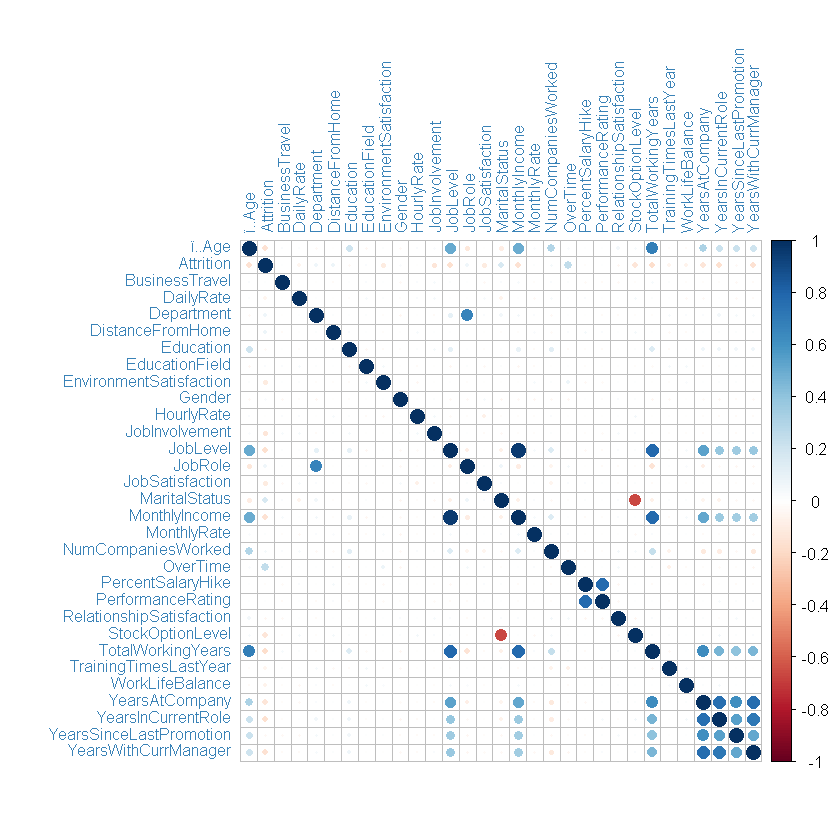

In [6]:
# draw the correlation matrix plot
library(corrplot)
corrplot(cor(d), method = "circle", tl.col = "#3982B7", mar = c(2, 0, 0, 0), tl.cex = 0.8)

- The above correlation matrix displays the linear correlation between every pair of features in the form of dots of varying colors and sizes.
- A larger dot indicates that the correlation between these selected features is stronger, whereas the color denotes the strength of the positive (blue) or negative (red) correlation coefficient.
- This application in Shiny App has an additional functionality: by clicking any element in the correlation matrix, a 2D histogram is displayed in order to better observe the correlation between those features.

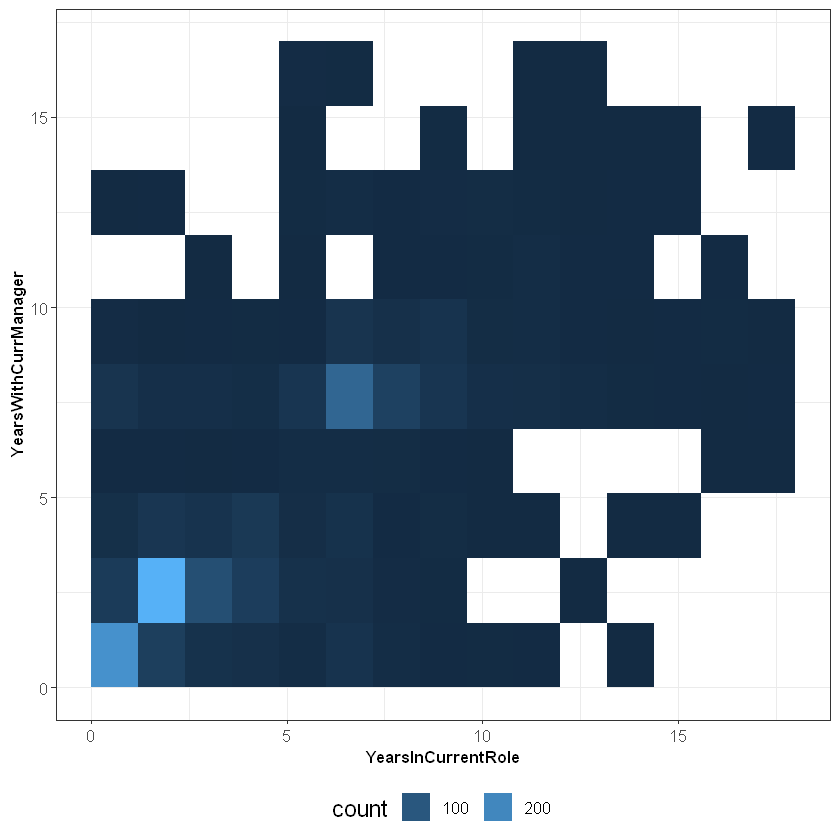

In [7]:
library(ggplot2)

# construct correlation plot using ggplot2 stat_bin2d
ggplot(d, aes(YearsInCurrentRole, YearsWithCurrManager))+ 
stat_bin2d(bins = c(15, 10))+           #set bin numbers
guides(colour = guide_legend(override.aes = list(alpha = 1)),
fill = guide_legend(override.aes = list(alpha = 1)))+
theme_bw()+theme(axis.text=element_text(size=10),
axis.title=element_text(size=10,face="bold"),
legend.text=element_text(size=10),legend.title=element_text(size=14),
legend.position = "bottom")+
xlab("YearsInCurrentRole")+ylab("YearsWithCurrManager")

- Alternatively, clicking the elements along the leading diagonal will output violin plots of the selected features, bucketed by the true underlying attrition value (1 indicating employees that attrite, and 0 indicated those that remain).

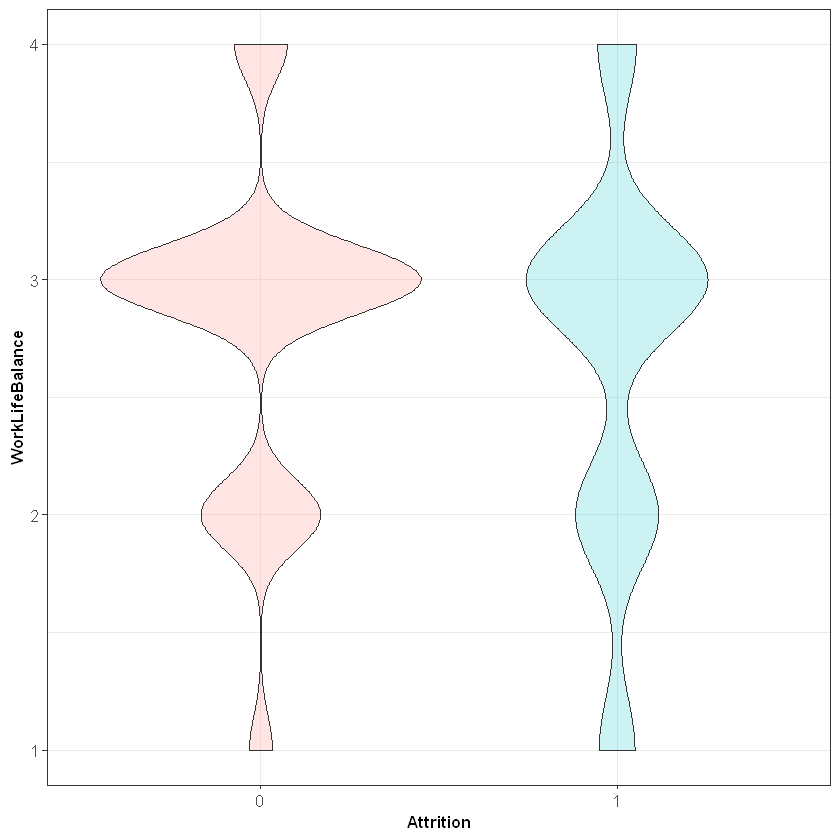

In [8]:
# construct violin plot using ggplot2 geom_violin
ggplot(d, aes(factor(Attrition), WorkLifeBalance))+   
geom_violin(alpha = 0.2, aes(fill = factor(Attrition)))+ 
#set violin plot
theme_bw()+                         #set theme and legend
guides(fill=FALSE)+theme(axis.text=element_text(size=10),
axis.title=element_text(size=10,face="bold"),
legend.text=element_text(size=10),
legend.title=element_text(size=14),legend.position = "bottom")+
xlab("Attrition")   

## Data Preprocessing

In [9]:
# load packages
library("xgboost")
library("e1071")
library("MASS")
library("xtable")

### Data Partitioning

__The data is partitioned into three sets: training, validation and testing:__

- The training set is responsible for initially teaching the model the causal relationship between all information and the attrition probability.
- The validation set is then used to estimate how well the model has been trained and fine tune the parameters to develop the best model.
- Once those two steps have been completed, The completed model is applied to the testing set in order to get accurate results on how the model would perform on real-world data.

In [10]:
# Create data for training and test
set.seed(0)
tr.number<-sample(nrow(d),nrow(d)*2/3)  
# we split whole dataset into 2/3 training data and 1/3 testing data
train<-d[tr.number,]
test<-d[-tr.number,]

column_names = names(test)

# split dataset
train_Y = as.numeric(train$Attrition)
train$Attrition<-NULL
test_Y = test$Attrition
test$Attrition<-NULL

# numericize training and testing data
train[] <- lapply(train, as.numeric)
test[] <- lapply(test, as.numeric)

### Data Modeling with Machine Learning

- XGBoost is a decision tree based algorithm. Multiple trees are ensembled to improve the predictive power of the model.
- SVM is a discriminative classifier that takes labeled training data and constructs a hyperplane to categorize new examples.
- Logistic regression is a simple classifier used to estimate the probability of a binary outcome based on several predictors and a logit function.

#### XGBoost model

- The first model we fit is an extreme gradient boosting (XGBoost) model. For more detail, http://xgboost.readthedocs.io/en/latest/parameter.html.

- Here, we choose maximum depth of tree as 3, step size shrinkage parameter as 0.3, use logistic regression for binary classification with area under the curve(auc) as an evaluation metric for validation data. These default values we have set can be tuned to optimize for accuracy in a true analysis.

In [11]:
# Construct xgb.DMatrix object from training matrix
dtrain <- xgb.DMatrix(as.matrix(train), label = train_Y)

# Create a list of parameters for XGBoost model
param <- list(max_depth=3, 
              silent=1, 
              eta = 0.3,
              objective='binary:logistic',
              eval_metric = 'auc')

# Training a XGBoost model using training dataset and chosen parameters
bst <- xgb.train(param, nrounds = 82, dtrain)

# Predicting the results using testing dataset
pred.xgb <- predict(bst, as.matrix(test))

# Create a table indicating the most important features of XGBoost model
importance <- xgb.importance(feature_names = column_names, model = bst)

- The XGBoost object, bst, created from training the model is a list that contains basic information for the model training, e.g. the parameters settings, etc. The predict step allows us to make a prediction using the separate test dataset.

In [12]:
#We can show the first 5 predictions here as,

head(pred.xgb)
cat("The result shows us the first five predicted probabilities for the test dataset. For example, the first observation’s prediction is", {pred.xgb[1]}, "based on our model, that employee will have a chance to attrite by around",{ceiling(pred.xgb[1]*100)},"%")

[1] 0.68773174 0.20049529 0.02522733 0.02317090 0.98025709 0.07951519

The result shows us the first five predicted probabilities for the test dataset. For example, the first observation’s prediction is 0.6877317 based on our model, that employee will have a chance to attrite by around 69 %

##### Feature Importance
- A great advantage of using XGBoost model is its built-in ability to show us a feature importance table.
- The importance metric provides a score indicating how valuable each factor was in the construction of the boosted decision trees.
- Higher relative importance indicates a larger impact on the algorithm and final prediction.
- To actively improve overall employee retention issues, we can use this to look more closely at the most important features that determine the attrition.
- In the figure below, we visualize the top 10 important features in histogram using metric.

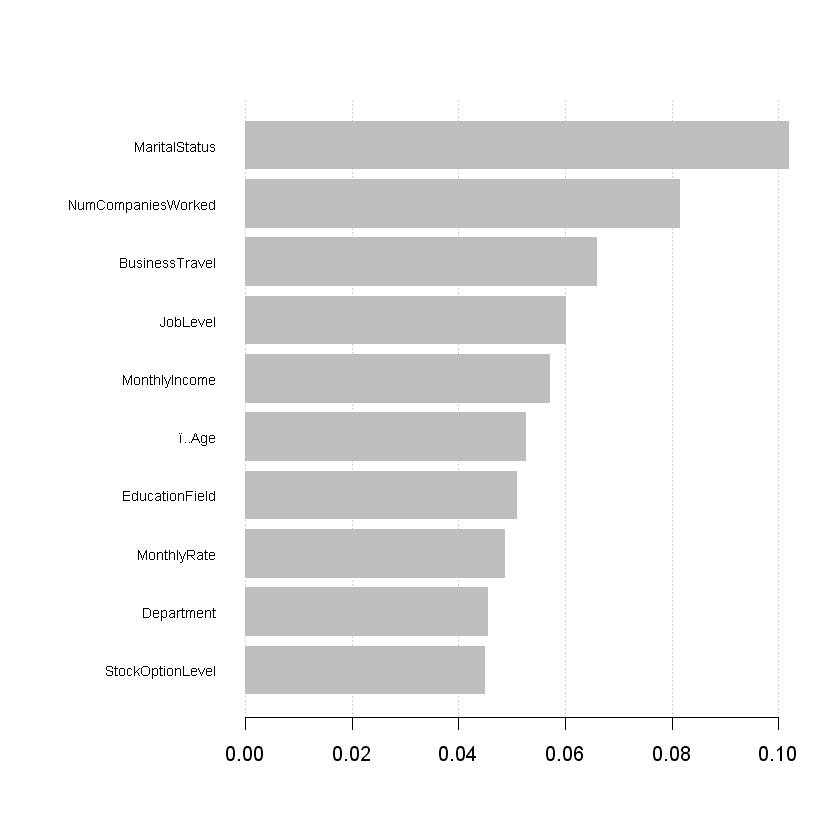

In [13]:
xgb.plot.importance(importance_matrix = importance, top_n = 10)

#### SVM model
- The second model we fit is a support vector machine(SVM) model. Basically, a SVM constructs a hyperplane or a set of hyperplanes that have the largest distance to the nearest training data points of other classes.

- We choose a radial kernel with proper gamma and cost values here to optimize the performance of SVM. Again, these should be tuned in a full analysis.

In [14]:
train$Attrition<-train_Y

# Training a SVM 
svm_model<-svm(Attrition~.,                #set model formula
                type="C-classification",   #set classification machine
                gamma=0.001668101,         #set gamma parameter
                cost=35.93814,             #set cost parameter
                data=train,
                cross=3,                   #3-fold cross validation
                probability = TRUE        #allow for probability prediction
)

# Predicting the results using testing dataset
# Obtain the predicted class 0/1
svm_model.predict<-predict(svm_model, test, probability=TRUE) 

# Obtain the predicted probability for class 0/1
svm_model.prob <-attr(svm_model.predict,"probabilities") 
svm_model


Call:
svm(formula = Attrition ~ ., data = train, type = "C-classification", 
    gamma = 0.001668101, cost = 35.93814, cross = 3, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  35.93814 
      gamma:  0.001668101 

Number of Support Vectors:  342


- The SVM model object is a list presenting basic information about the parameters, number of support vectors, etc.
- The number of support vectors depends on how much slack we allow when training the model.
- If we allow a large amount of flexibility, we will have a large number of support vectors.

#### Logistic regression model

- The third model we fit is a logistic regression model.
- The logit function always generates a predicted value between 0 and 1 that can be interpreted as  a probability.

In [15]:
# Training a logistic regression model
LR_model <- glm(Attrition ~.,family=binomial(link='logit'),data=train)

# Predicting the results using testing dataset
LR_model.predict <- predict(LR_model, test, type = "response")
coef(LR_model)

(Intercept)                   ï..Age           BusinessTravel 
           -8.272882e-01            -2.868197e-02             6.732776e-02 
               DailyRate               Department         DistanceFromHome 
           -3.552768e-04             5.465854e-01             4.282487e-02 
               Education           EducationField  EnvironmentSatisfaction 
            1.841232e-02             9.824066e-02            -4.793673e-01 
                  Gender               HourlyRate           JobInvolvement 
            4.535281e-01            -3.278262e-05            -4.220547e-01 
                JobLevel                  JobRole          JobSatisfaction 
           -6.600504e-01            -6.736794e-02            -3.482584e-01 
           MaritalStatus            MonthlyIncome              MonthlyRate 
            6.059343e-01             3.649747e-06             7.653307e-06 
      NumCompaniesWorked                 OverTime        PercentSalaryHike 
            1.823840e-01             1.864827e+00            -4.075285e-02 
       PerformanceRating RelationshipSatisfaction         StockOptionLevel 
            1.735434e-01            -2.146425e-01            -1.618772e-01 
       TotalWorkingYears    TrainingTimesLastYear          WorkLifeBalance 
           -4.427541e-02            -1.869216e-01            -1.817880e-01 
          YearsAtCompany       YearsInCurrentRole  YearsSinceLastPromotion 
            1.442924e-01            -1.930590e-01             1.587872e-01 
    YearsWithCurrManager 
           -1.477998e-01

## R-Shiny Employee Attrition Modeling Application

In [25]:
# load packages
library("ggplot2"); 
library("corrplot"); 
library("ROCR"); 
library("caret")

### Fine-Tuning the Results
- Each algorithm gives a confidence score(probability) between 0 and 1 for each employee, indicating that these individuals are somewhere between 0% and 100% likely to attrite, respectively.
- By setting the confidence score threshold, above which we predict an employee to leave, we end up with a control on the precision and recall statistics.
- The cutoff can be adjusted in real-time, in the RShiny application, to optimize the model based on the needs of the business.

#### ROC Curve
- A receiver operating characteristic (ROC) curve is the result of plotting the true positive rate against the false positive rate.
- The closer the ROC curve is to the top left corner, the greater the accuracy of the test.

In [17]:
# Create a prediction object using previously saved results
ROCRpred_xgb <- prediction(pred.xgb, test_Y)
ROCRpred_svm <- prediction(svm_model.prob[,2], test_Y)
ROCRpred_lr <- prediction(LR_model.predict, test_Y)

#XGBoost roc data
perf_xgb <- performance(ROCRpred_xgb, "tpr", "fpr")                  
roc_xgb.data <- data.frame(fpr=unlist(perf_xgb@x.values),
                tpr=unlist(perf_xgb@y.values), model="XGBoost")
                    
#SVM roc data
perf_svm <- performance(ROCRpred_svm, 'tpr','fpr')                  
roc_svm.data <- data.frame(fpr=unlist(perf_svm@x.values),
                tpr=unlist(perf_svm@y.values), model="SVM")
                    
#Logistic Regression roc data
perf_lr <- performance(ROCRpred_lr, 'tpr','fpr')                    
roc_lr.data <- data.frame(fpr=unlist(perf_lr@x.values),
                          tpr=unlist(perf_lr@y.values), model="LR")

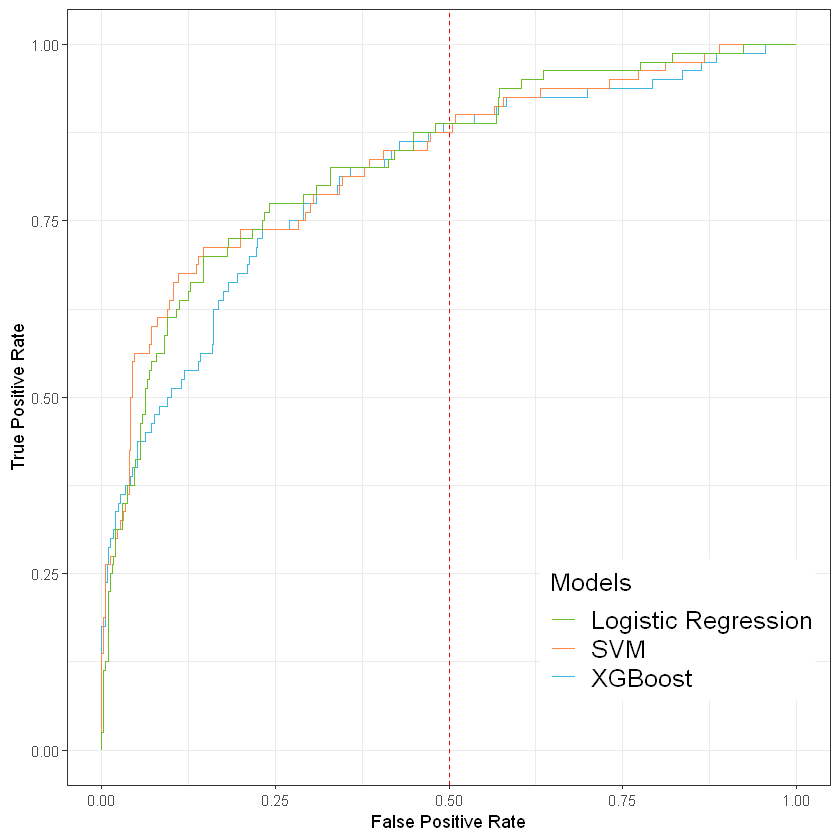

In [18]:
# Plotting ROC Curve

# Define colors for roc plot
cols <- c("XGBoost" = "#3DB7E4", "SVM" = "#FF8849", "Logistic Regression" = "#69BE28")

# Create roc plot
ggplot() + 
geom_line(data = roc_xgb.data, aes(x=fpr, y=tpr, colour = "XGBoost")) + #set XGBoost roc curve
geom_line(data = roc_svm.data, aes(x = fpr, y=tpr, colour = "SVM")) + #set SVM roc curve
geom_line(data = roc_lr.data, aes(x = fpr, y=tpr, colour = "Logistic Regression")) + 

#set LR roc curve
geom_vline(xintercept = 0.5, color = "red", linetype=2) + theme_bw() + #set themes
scale_colour_manual(name = "Models", values = cols) + 
xlab("False Positive Rate") +
ylab("True Positive Rate") +
theme(legend.position = c(0.8, 0.2), 
legend.text = element_text(size = 15), 
legend.title = element_text(size = 15))

- The plot above indicates that the performance of the three different machine learning models are roughly the same. Slight variations show that if the false positive rate is above 0.6 then SVM and logistic regression seem marginally better than the XGBoost model.

- A slider is added to adjust the vertical red line in the Shiny application. The slider allows the user to change the operation point of the algorithm by setting the false positive rate. The changes made to this cut-off are reflected in the confusion matrices.

#### Confusion Matrix
Here is the logic and the code for how to draw the confusion matrix:

1. Obtain the auc, fpr and tpr using prediction function
2. Define get_cutoff_point function to obtain the cutoff probability given a fixed fpr. Any predicted probability that is greater than the cutoff will be classified as attrition and vise versa.
3. Define draw_confusion_matrix function to draw a confusion matrix plot given calculated confusion table, auc and chosen color.
4. Take a look of three confusion matrices from three models and compare their auc, fpr,tpr and accuracy.

In [19]:
# Define a function to obtain the cutoff probability
# @perf is a S4 object gotten from @performance function
# @threshold is the targeted fpr
# In the ShinyApp, users can adjust the threshold by themselves and
# obtain different confusion matrix accordingly. Here, we always set
# threshold = 0.5 just for illustration.
get_cutoff_point <- function(perf, threshold)
  {
    cutoffs <- data.frame( fpr=perf@x.values[[1]], tpr=perf@y.values[[1]]) #cut=perf@alpha.values[[1]],
    cutoffs <- cutoffs[order(cutoffs$tpr, decreasing=TRUE),]
    cutoffs <- subset(cutoffs, fpr <= threshold)
    if(nrow(cutoffs) == 0){ return(1.0)}
    else return(cutoffs[1, 1])
}

# Define a function to draw a confusion matrix plot
# @cm is a confusion matrix obtained from @confusionMatrix function
# @auc is the auc value obtained from @performance function
# @color is the kind of color you want for true positive and true negative areas
# In this function, we also add in accuracy information which calculates the
# overall performance of model
draw_confusion_matrix <- function(cm, auc, color) {

  layout(matrix(c(1,1,2)))
  par(mar=c(0,0.1,1,0.1))
  plot(c(125, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')

  # create the matrix 
  rect(150, 430, 240, 370, col=color)
  text(195, 435, '0', cex=1.2)
  rect(250, 430, 340, 370, col='white')
  text(295, 435, '1', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='white')
  rect(250, 305, 340, 365, col=color)
  text(140, 400, '0', cex=1.2, srt=90)
  text(140, 335, '1', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='black')
  text(295, 400, res[3], cex=1.6, font=2, col='black')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(0, 100), c(0, 50), type = "n", xlab="", ylab="", main = "", xaxt='n', yaxt='n')

  # add in the accuracy information 

  text(25, 30, "AUC", cex=1.8, font=2)
  text(25, 20, round(as.numeric(auc), 3), cex=1.8)
  text(75, 30, names(cm$overall[1]), cex=1.8, font=2)
  text(75, 20, round(as.numeric(cm$overall[1]), 3), cex=1.8)
}

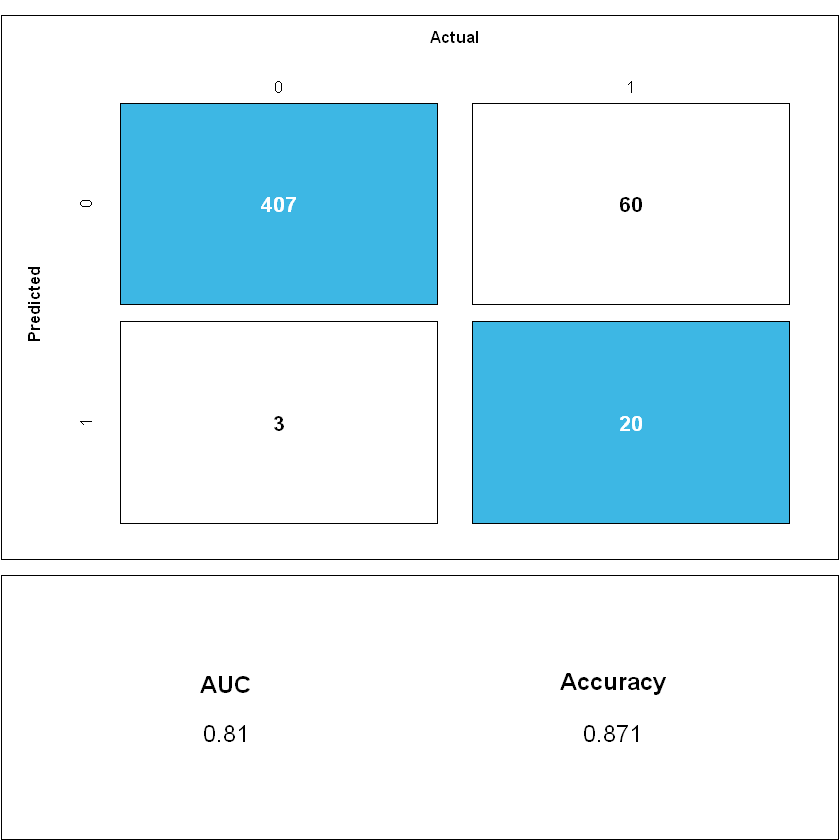

In [20]:
# draw XGBoosting confusion matrix
auc_xgb <- performance(ROCRpred_xgb, measure = "auc")  #obtain auc from @performance
perf_xgb <- performance(ROCRpred_xgb, "prec", "cutoff")  #obtain tpr and fpr from @performance                   
cut <- get_cutoff_point(perf_xgb, 0.7) #obtain the cutoff probability
pred_values_xgb <- ifelse(pred.xgb > cut,1,0) #classify using cutoff probability
cm_xgb <- confusionMatrix(data = factor(pred_values_xgb), reference = factor(test_Y)) #obtain confusion matrix
draw_confusion_matrix(cm_xgb, auc_xgb@y.values, "#3DB7E4")  #Draw confusion matrix plot

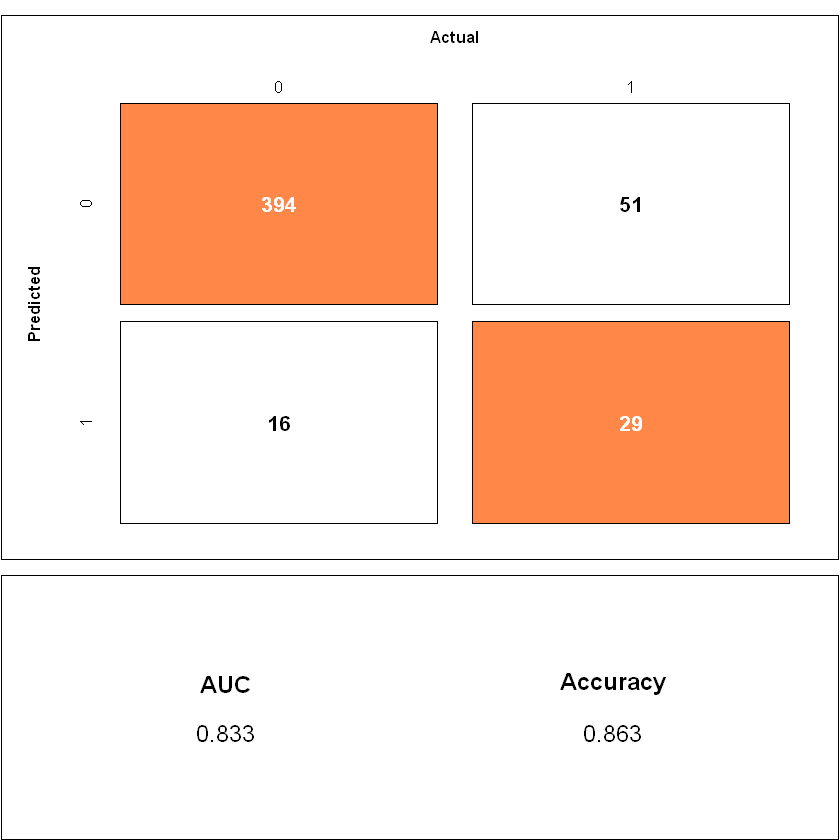

In [21]:
# draw SVM confusion matrix
auc_svm <- performance(ROCRpred_svm, measure = "auc")
perf_svm <- performance(ROCRpred_svm, 'tpr','fpr')                  
cut <- get_cutoff_point(perf_svm, 0.5)
pred_values_svm <- ifelse(svm_model.prob[,2] > cut,1,0)
cm_svm <- confusionMatrix(data = factor(pred_values_svm), reference = factor(test_Y))
draw_confusion_matrix(cm_svm, auc_svm@y.values, "#FF8849")

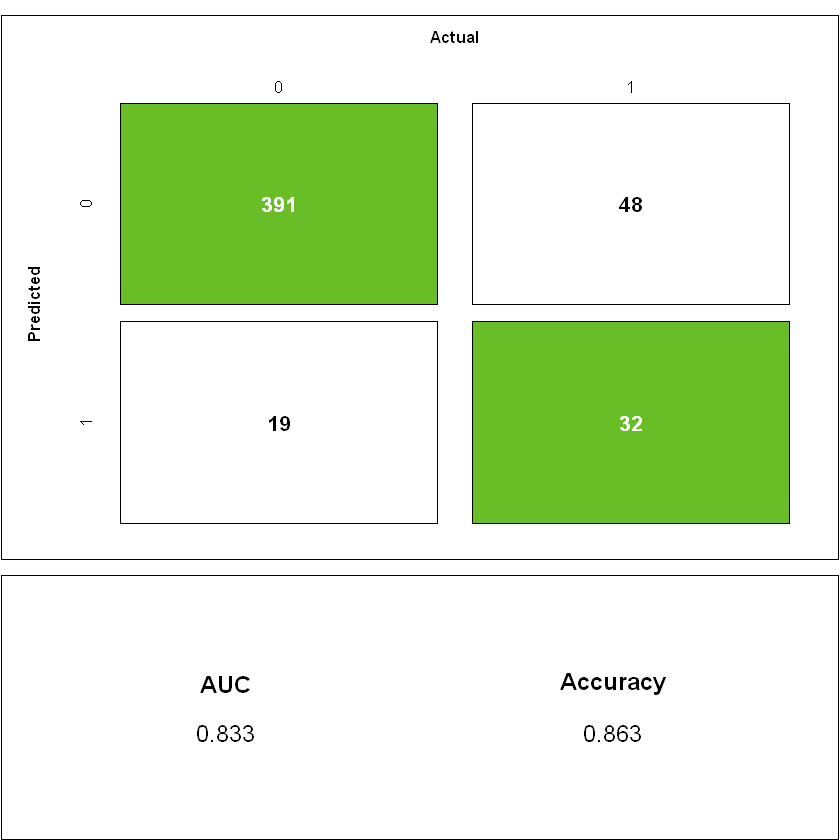

In [22]:
# draw Logistic regression confusion matrix
auc_lr <- performance(ROCRpred_lr, measure = "auc")
perf_lr <- performance(ROCRpred_lr, 'tpr','fpr')                    
cut <- get_cutoff_point(perf_lr, 0.5)
pred_values_lr <- ifelse(LR_model.predict > cut,1,0)
cm_lr <- confusionMatrix(data = factor(pred_values_lr), reference = factor(test_Y))
draw_confusion_matrix(cm_lr, auc_lr@y.values, "#69BE28")

#### Precision and Recall
- Another way to visualize this result is to look at precision and recall.
- By controlling the cutoff, we can compare precision and recall values among different models in this plot.

Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

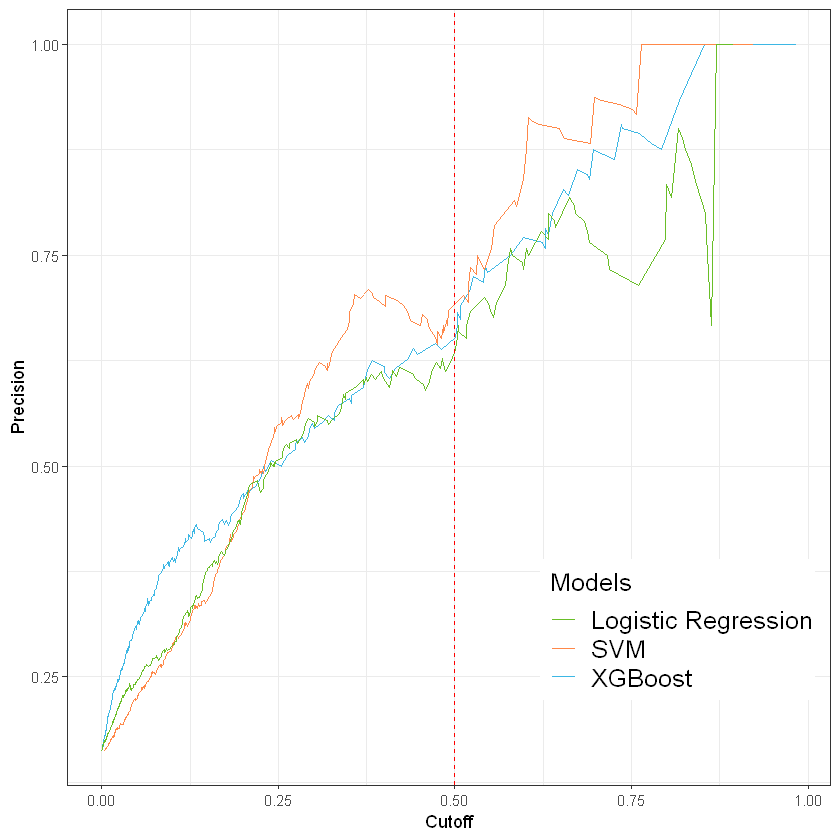

In [23]:
#Create precision plot

#XGBoost
perf_xgb <- performance(ROCRpred_xgb,'prec', 'cutoff') #use 'prec' and 'cutoff' as measurements                 
xgb.data <- data.frame(x=unlist(perf_xgb@x.values), y=unlist(perf_xgb@y.values),
            model="XGBoost")
                    
#SVM
perf_svm <- performance(ROCRpred_svm,'prec', 'cutoff')                  
svm.data <- data.frame(x=unlist(perf_svm@x.values), y=unlist(perf_svm@y.values), 
            model="SVM")
                    
#Logistic Regression
perf_lr <- performance(ROCRpred_lr,'prec', 'cutoff')                    
lr.data <- data.frame(x=unlist(perf_lr@x.values), y=unlist(perf_lr@y.values),
           model="LR")
                    

cols <- c("XGBoost" = "#3DB7E4", "SVM" = "#FF8849", "Logistic Regression" = "#69BE28")
                    
ggplot() +
geom_line(data = xgb.data, aes(x=x, y=y, colour = "XGBoost")) + 
geom_line(data = svm.data, aes(x =x, y=y, colour = "SVM")) + 
geom_line(data = lr.data, aes(x =x, y=y, colour = "Logistic Regression")) + 
scale_colour_manual(name = "Models", values = cols) + 
xlab("Cutoff") +
ylab("Precision") +
geom_vline(xintercept = 0.5, color = "red", linetype=2) + theme_bw() +
theme(legend.position = c(0.8, 0.2), 
legend.text = element_text(size = 15), 
legend.title = element_text(size = 15))

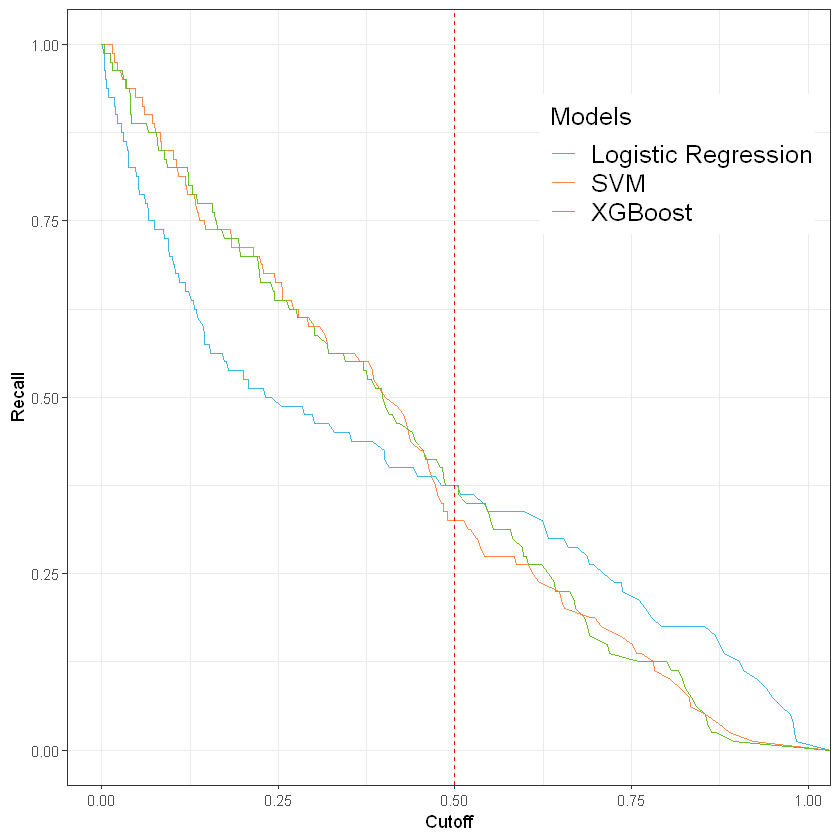

In [24]:
#Create recall plot

#XGBoost
perf_xgb <- performance(ROCRpred_xgb,'rec', 'cutoff')                   
xgb.data <- data.frame(x=unlist(perf_xgb@x.values), y=unlist(perf_xgb@y.values), model="XGBoost")
                    
#SVM
perf_svm <- performance(ROCRpred_svm,'rec', 'cutoff')                   
svm.data <- data.frame(x=unlist(perf_svm@x.values), y=unlist(perf_svm@y.values), model="SVM")
                    
#Logistic Regression
perf_lr <- performance(ROCRpred_lr,'rec', 'cutoff')                 
lr.data <- data.frame(x=unlist(perf_lr@x.values), y=unlist(perf_lr@y.values), model="LR")

cols <- c("XGBoost" = "#3DB7E4", "SVM" = "#FF8849", "Logistic Regression" = "#69BE28")

ggplot() +
geom_line(data = xgb.data, aes(x=x, y=y, colour = "XGBoost")) + 
geom_line(data = svm.data, aes(x=x, y=y, colour = "SVM")) + 
geom_line(data = lr.data, aes(x=x, y=y, colour = "Logistic Regression")) + 
scale_colour_manual(name = "Models", values = cols) + 
xlab("Cutoff") +
ylab("Recall") +
geom_vline(xintercept = 0.5, color = "red", linetype=2) + theme_bw() +
theme(legend.position = c(0.8, 0.8), 
legend.text = element_text(size = 15), 
legend.title = element_text(size = 15))

- The above figures show the Precision and Recall curves for the three models and illustrate how the cut-off will affect the precision and recall.

- Here, cutoff = 0.5 is used as a default in Shiny Application. The user can adjust the cutoff slider by themselves. As with the ROC curve, the confusion matrices for each algorithm are updated with changes to the slider location.

- With these results, we can give the HR department a list of the employees that are the most likely to leave, as well as the confidence score returned by the model.  Further, the confidence score can be combined with any HR metrics, which themselves can be modeled algorithmically if need-be, to give an expected value lost per individual. 